In [1]:
from sklearn.linear_model import LinearRegression
from typing import Any, Union
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import pyMechkar as mechkar
from scipy import stats
from random import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#desired_width=520
#pd.set_option('display.width', desired_width)
#np.set_printoptions(linewidth=desired_width)
#pd.set_option('display.max_columns',18)

In [3]:
Data = pd.read_csv("3products.csv", header=0)
#pd.options.display.max_columns = 13
#display(Data)
#print(Data.head())

In [4]:
Data.describe()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
count,8241.000000,8241.000000,8.241000e+03,8.241000e+03,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,...,8241.000000,8241.000000,8241.000000,8241.0,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000
mean,0.007833,22.652955,7.290002e+12,4.160040e+08,12.513166,6.815646,6.810091,6.173159,12.652285,15.294780,...,0.000243,0.255066,99966.091979,12757437.0,0.380658,29.458899,20.044347,0.085669,1.315211,12.694333
std,0.003765,6.911116,1.232103e+06,2.674107e+04,14.676011,5.007721,5.009808,22.826993,9.599435,10.159154,...,0.015578,0.435925,48037.739108,0.0,0.485578,3.425140,4.207285,0.279892,0.403900,14.426282
min,0.000000,11.000000,7.290000e+12,4.160000e+08,0.000000,2.750000,2.380000,-216.000000,0.350000,1.000000,...,0.000000,0.000000,401.000000,12757437.0,0.000000,21.570000,11.290000,0.000000,0.860000,0.000000
25%,0.005000,17.000000,7.290000e+12,4.160001e+08,2.000000,2.970000,2.970000,-3.000000,5.960000,7.810000,...,0.000000,0.000000,63645.000000,12757437.0,0.000000,26.860000,17.570000,0.000000,1.100000,3.000000
50%,0.007500,23.000000,7.290003e+12,4.160001e+08,11.000000,3.570000,3.570000,1.000000,10.170000,13.810000,...,0.000000,0.000000,95217.000000,12757437.0,0.000000,31.430000,21.290000,0.000000,1.210000,12.000000
75%,0.010000,29.000000,7.290003e+12,4.160002e+08,16.000000,13.820000,13.820000,12.000000,16.170000,19.570000,...,0.000000,1.000000,127233.000000,12757437.0,1.000000,32.000000,24.140000,0.000000,1.440000,16.000000
max,0.020600,34.000000,7.290003e+12,4.162001e+08,312.000000,13.820000,13.820000,240.000000,59.430000,59.430000,...,1.000000,1.000000,263223.000000,12757437.0,1.000000,34.000000,25.140000,1.000000,5.750000,216.000000


In [5]:
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [7]:
Data.dtypes[Data.dtypes=='float64']

Customer_ID              float64
Avg_Price_Change         float64
Avg_Price_Change_1       float64
Avg_Quantity_for_Week    float64
Avg_Quantity_for_PO      float64
Standard_Price           float64
Temp_Hi                  float64
Temp_Lo                  float64
Frequency_PO             float64
dtype: object

In [8]:
## determine the number of missing values
Data.isna().sum()

Customer_ID                          0
Weeknum                              0
Product                              0
Customer_Number                      0
Sum_Quantity                         0
Avg_Price_Change                     0
Avg_Price_Change_1                   0
Sum_Quantity_1_minus_Sum_Quantity    0
Avg_Quantity_for_Week                0
Avg_Quantity_for_PO                  0
All_week                             0
Count_week_PO                        0
Standard_Price                       0
Above_Standard_Price                 0
Below_Standard_Price                 0
Total_Quantity_for_Customer          0
Total_Quantity                       0
Holiday                              0
Temp_Hi                              0
Temp_Lo                              0
Temp_Rain                            0
Frequency_PO                         0
Sum_Quantity_1_Y                     0
dtype: int64

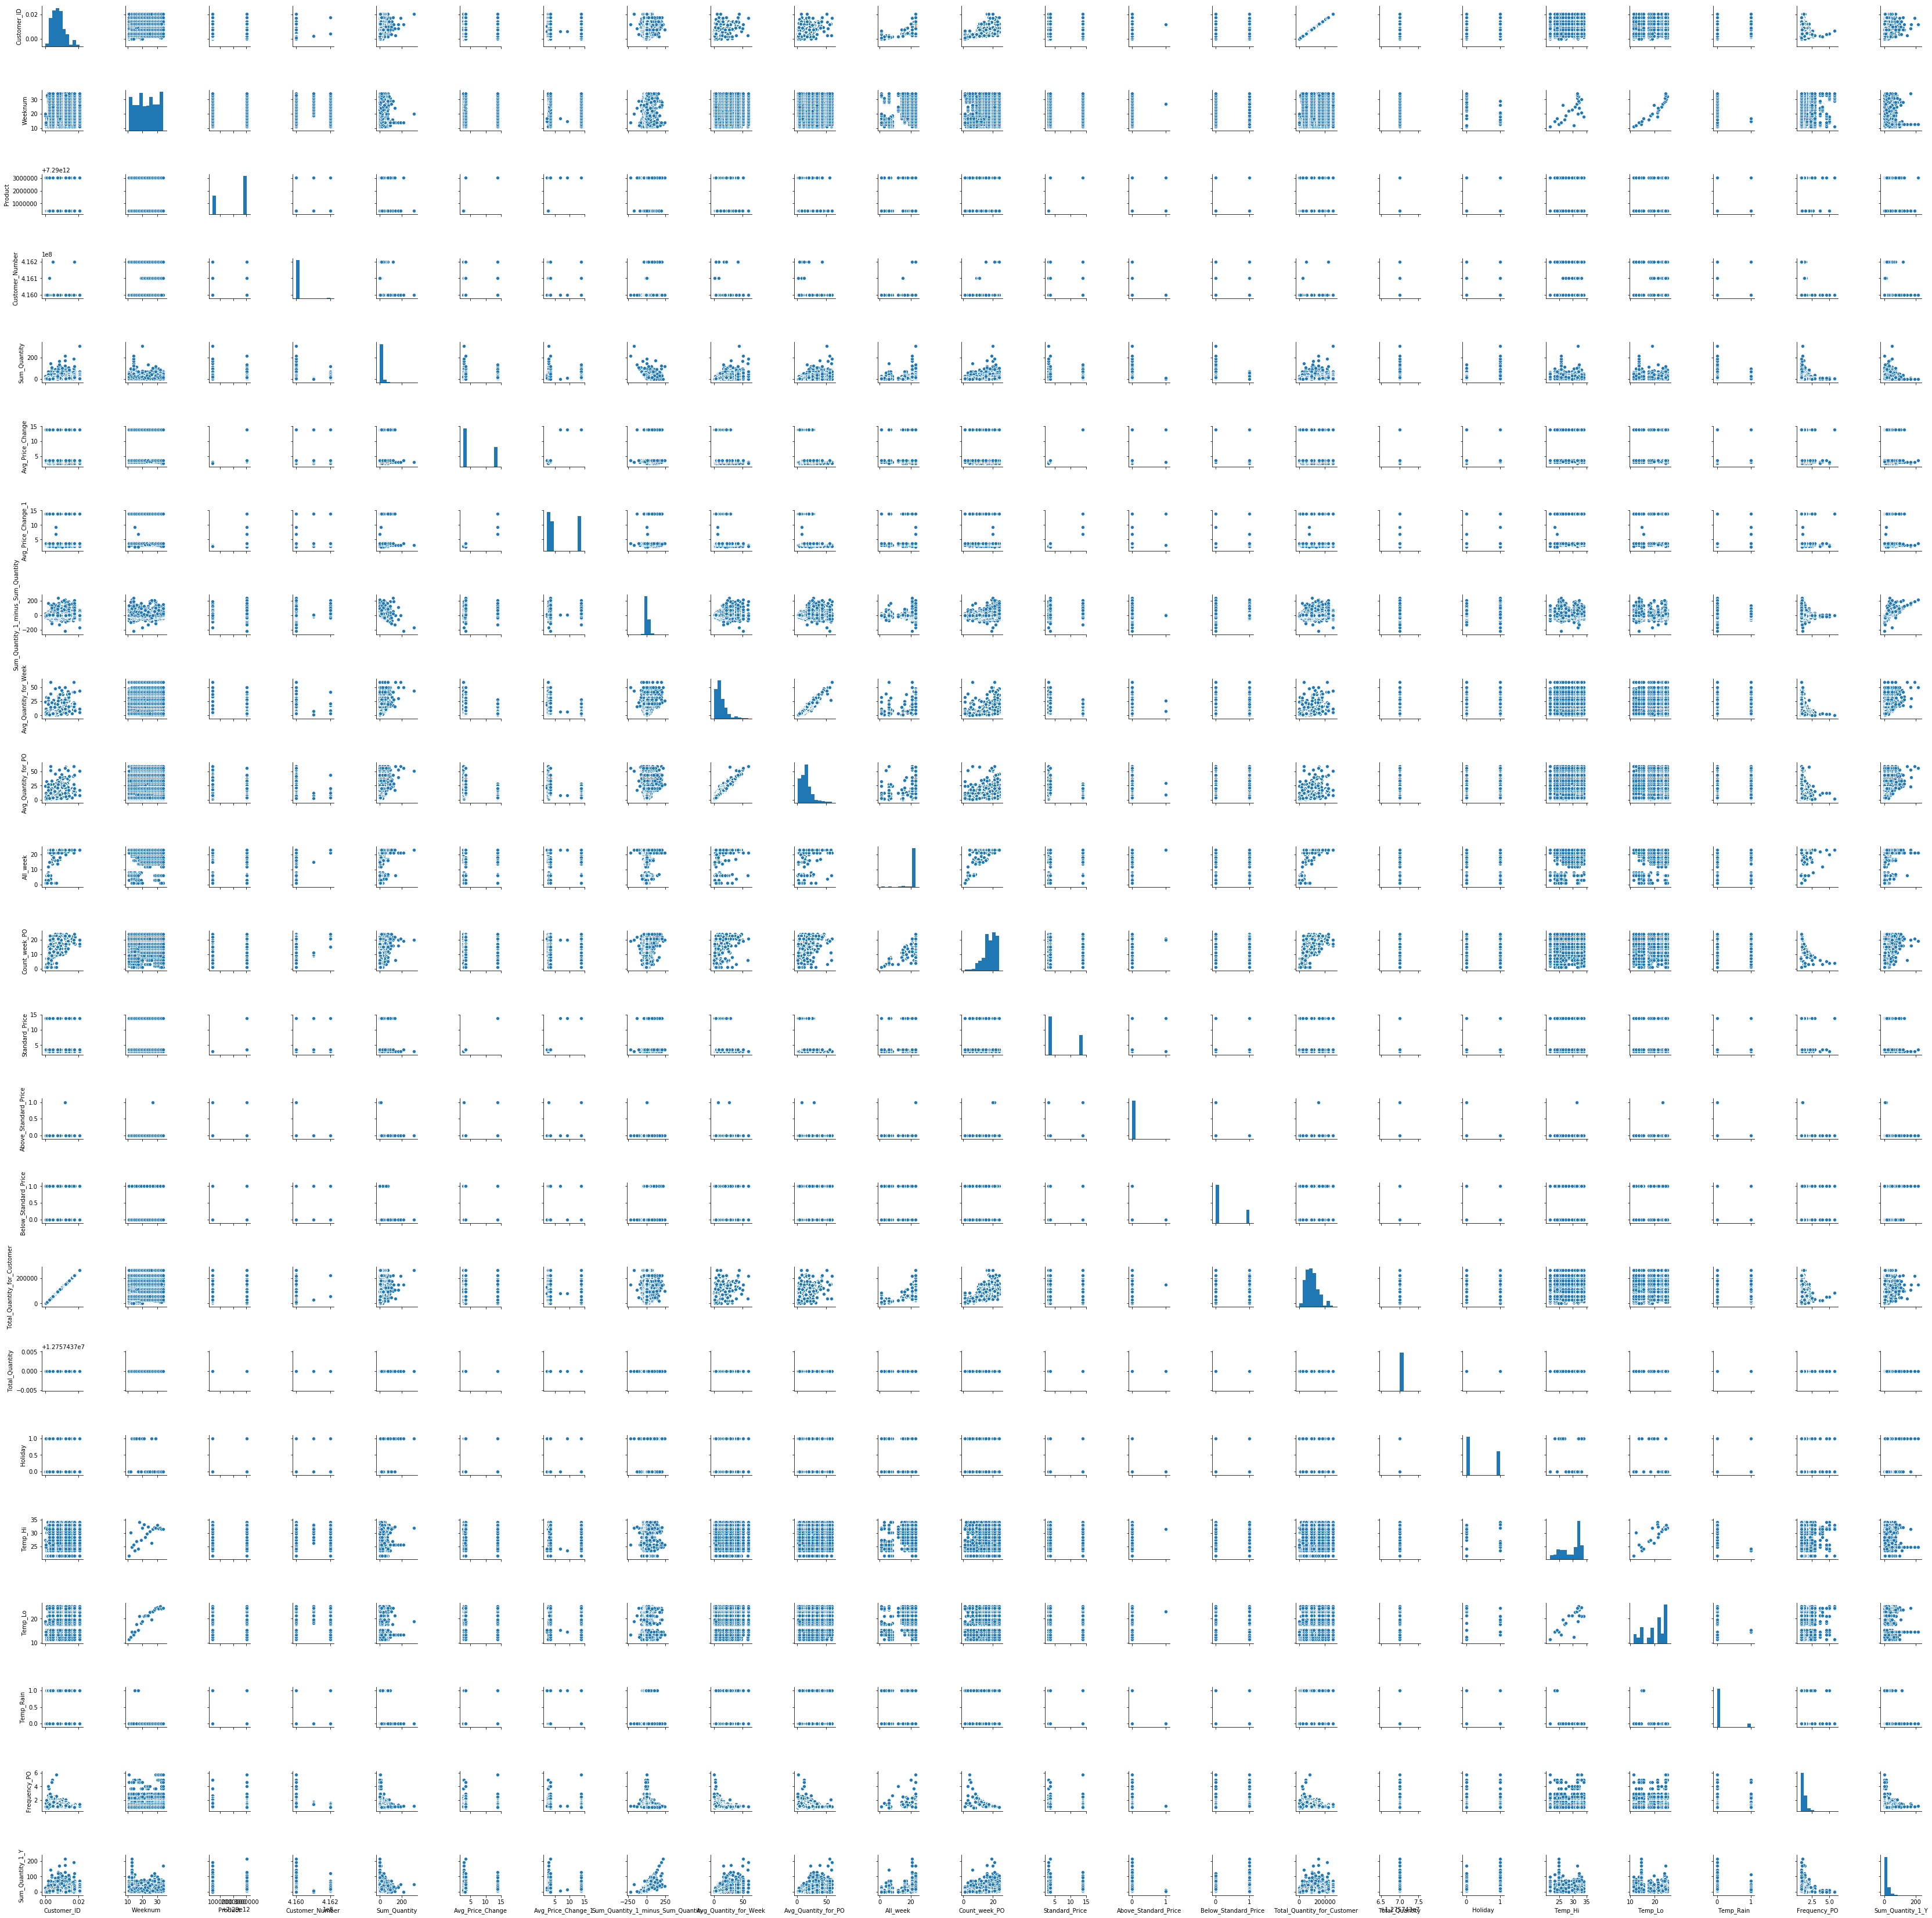

In [9]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(Data, height=2)
plt.show()

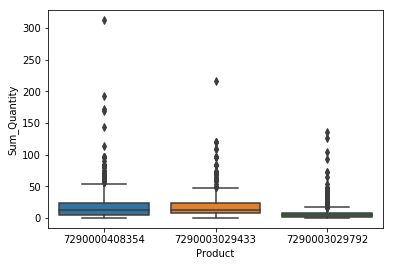

In [10]:
sns.boxplot(x=Data['Product'], y=Data['Sum_Quantity'])
plt.show()

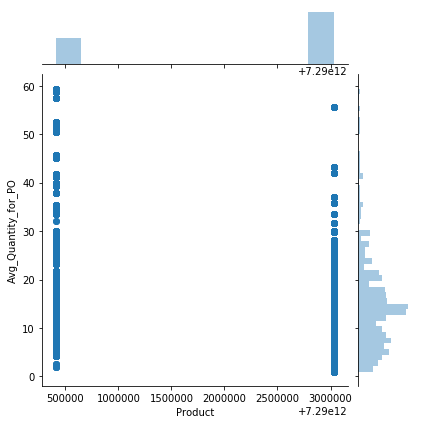

In [11]:
sns.jointplot(x=Data['Product'], y=Data['Avg_Quantity_for_PO'])
plt.show()

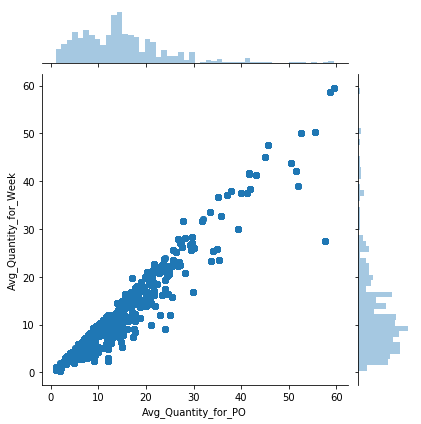

In [12]:
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()

In [13]:
Data2 = Data.copy()

In [14]:
Data2['Product'] = Data2['Product'].astype('category')


In [15]:
Data2['Customer_Number'] = Data2['Customer_Number'].astype('category')

In [16]:
Data2.dtypes

Customer_ID                           float64
Weeknum                                 int64
Product                              category
Customer_Number                      category
Sum_Quantity                            int64
Avg_Price_Change                      float64
Avg_Price_Change_1                    float64
Sum_Quantity_1_minus_Sum_Quantity       int64
Avg_Quantity_for_Week                 float64
Avg_Quantity_for_PO                   float64
All_week                                int64
Count_week_PO                           int64
Standard_Price                        float64
Above_Standard_Price                    int64
Below_Standard_Price                    int64
Total_Quantity_for_Customer             int64
Total_Quantity                          int64
Holiday                                 int64
Temp_Hi                               float64
Temp_Lo                               float64
Temp_Rain                               int64
Frequency_PO                      

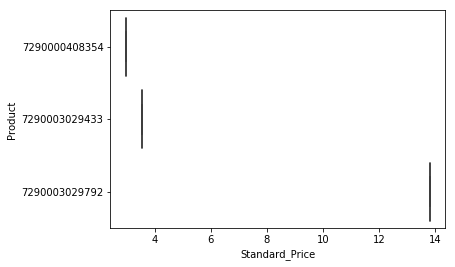

In [17]:
sns.boxplot(x=Data2['Standard_Price'], y=Data2['Product'])
plt.show()

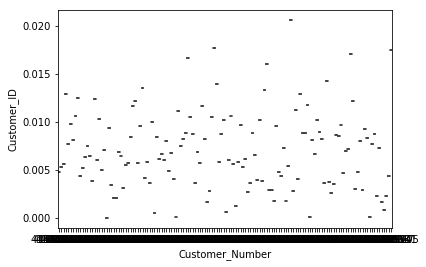

In [18]:
## Customet_ID alse reprosent the share of the customer, Customer number is the name of the customrt 
sns.boxplot(x=Data2['Customer_Number'], y=Data2['Customer_ID'])
plt.show()
# you can see that there are a few "big" customers, however the majority looks a like

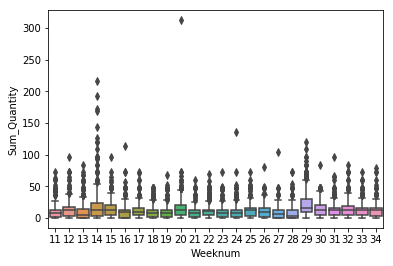

In [19]:
sns.boxplot(x=Data2['Weeknum'], y=Data2['Sum_Quantity'])
plt.show()

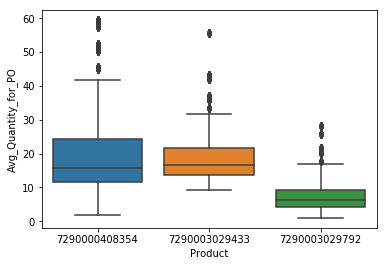

In [20]:
sns.boxplot(x=Data2['Product'], y=Data2['Avg_Quantity_for_PO'])
plt.show()

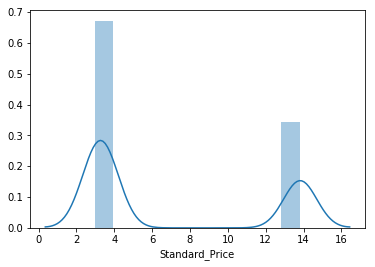

In [21]:
sns.distplot(Data['Standard_Price'])
plt.show()

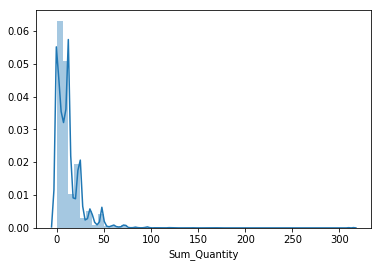

In [22]:
sns.distplot(Data['Sum_Quantity'])
plt.show()

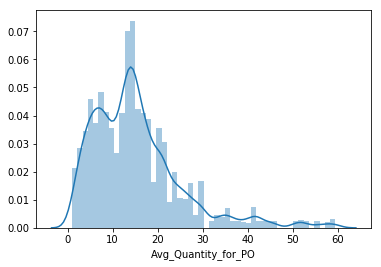

In [23]:
sns.distplot(Data['Avg_Quantity_for_PO'])
plt.show()

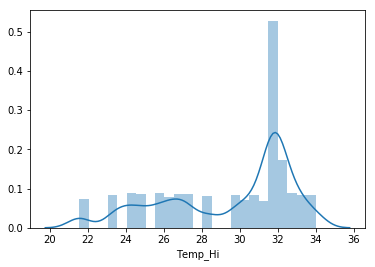

In [24]:
sns.distplot(Data['Temp_Hi'])
plt.show()

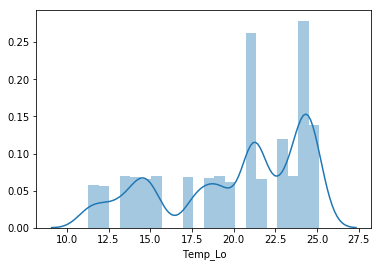

In [25]:
sns.distplot(Data['Temp_Lo'])
plt.show()

In [26]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

##Data3 = Data2.drop(columns=['Avg_Price_Change','Sum_Quantity_1_minus_Sum_Quantity','Avg_Quantity_for_Week' , 'All_week', 'Count_week_PO', 'Above_Standard_Price', 'Below_Standard_Price', 'Total_Quantity','Avg_Price_Change_1','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO','Holiday' ])
##Data3.head

In [27]:
tab1=mechkar.pyMechkar().Table1(data=Data2, y='Customer_number' )
tab1

Factorizing... please wait
***********************
[]
------ Finished in 2.8229823112487793econds -----


,Del,Variables,Categories,n,Population
0,0,Individuals,n,1,8241
1,0,Customer_ID,Mean (SD),1,0.00 ( 0.00)
2,0,Customer_ID,Median (IQR),2,0.00 ( 0.00- 0.00)
3,1,Customer_ID,Missing (%),3,--
4,0,Weeknum,Mean (SD),1,22.70 ( 6.90)
5,0,Weeknum,Median (IQR),2,23.00 ( 17.00- 29.00)
6,1,Weeknum,Missing (%),3,--
7,0,Product,7290003029792,0,"2,715.00 ( 32.90%)"
8,0,Product,7290003029433,1,"2,743.00 ( 33.30%)"
9,0,Product,7290000408354,2,"2,783.00 ( 33.80%)"


C:\Python\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Python\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


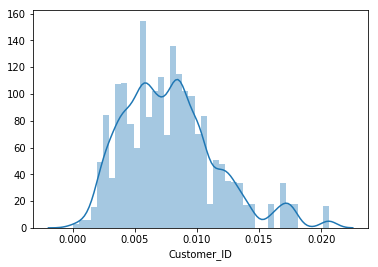

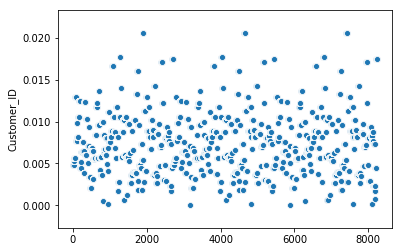

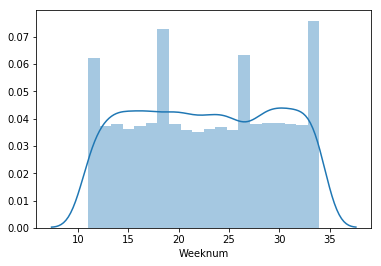

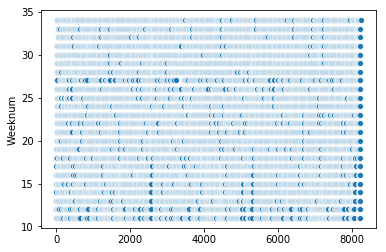

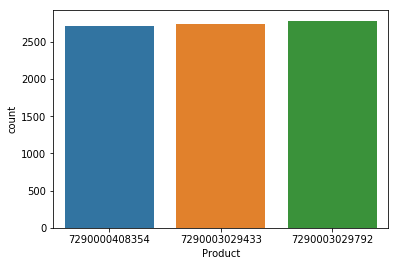

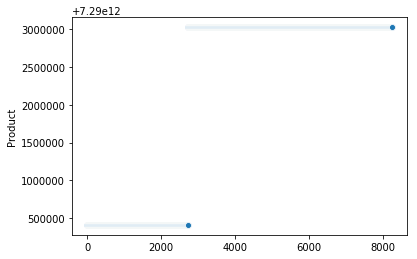

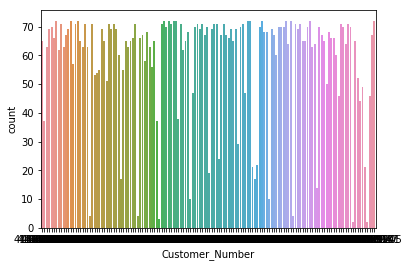

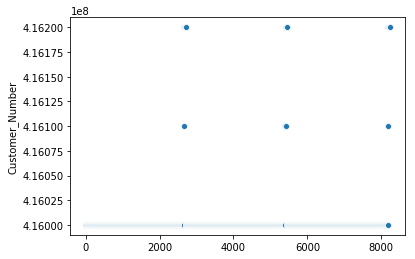

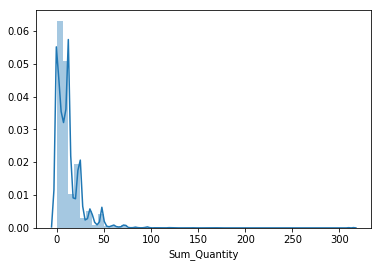

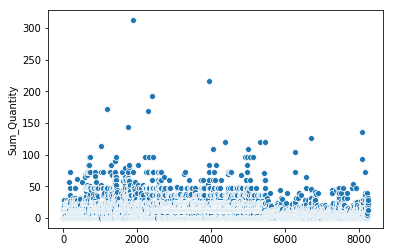

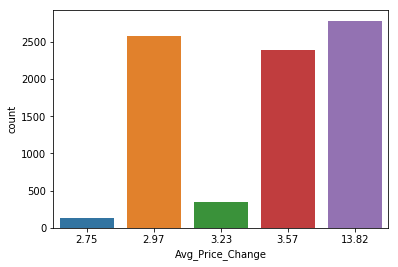

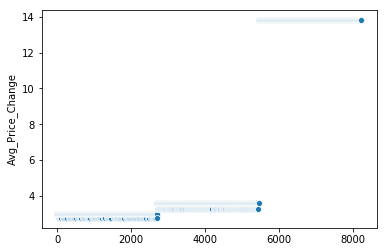

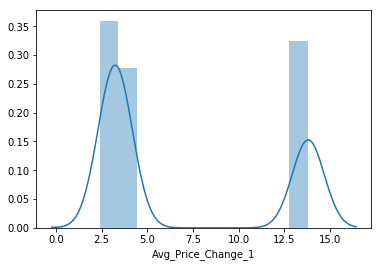

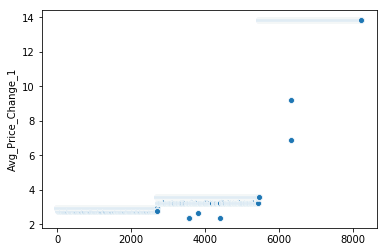

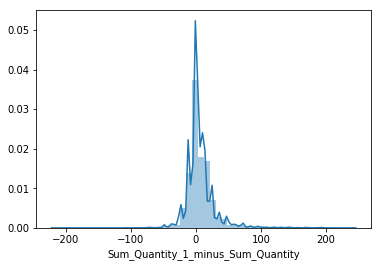

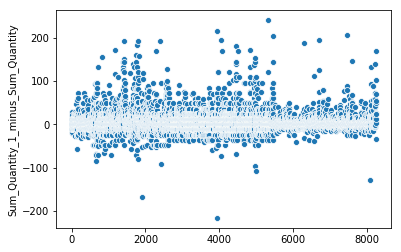

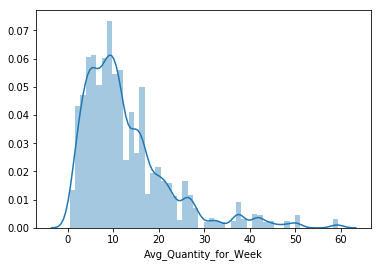

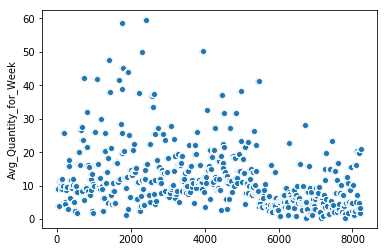

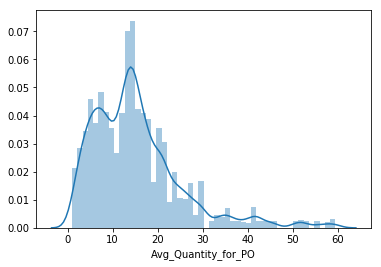

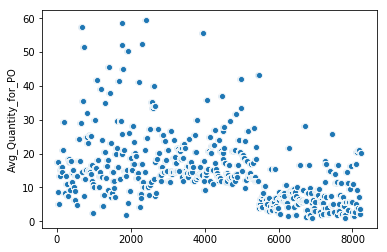

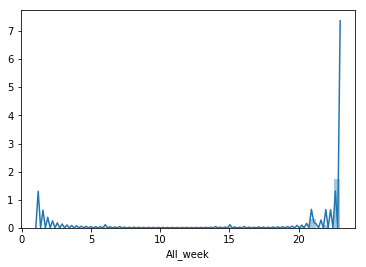

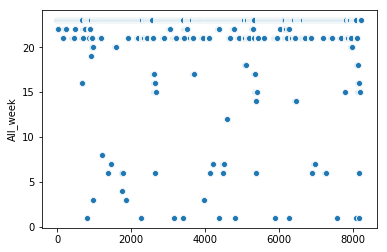

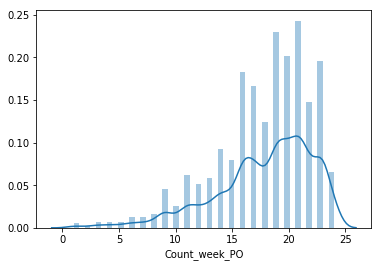

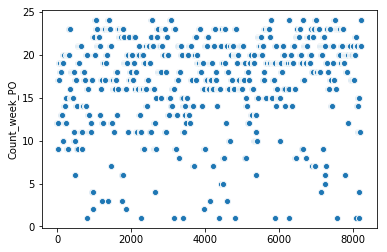

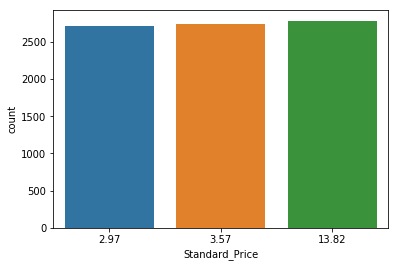

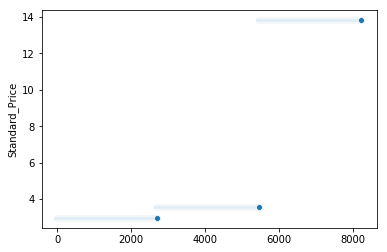

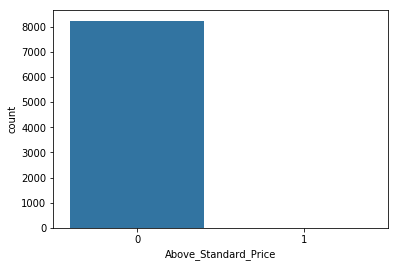

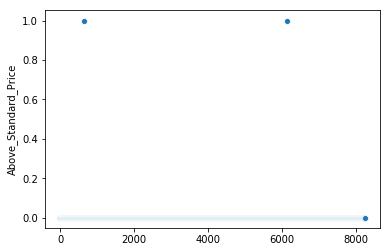

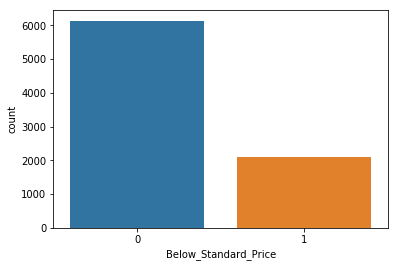

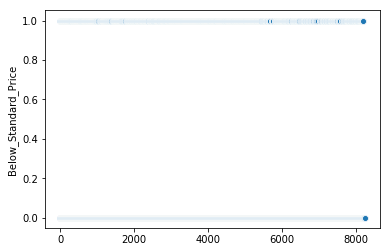

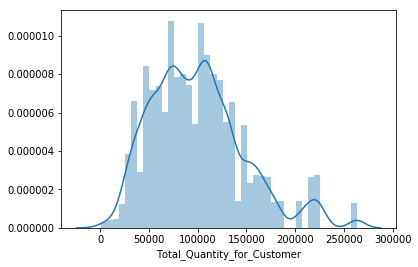

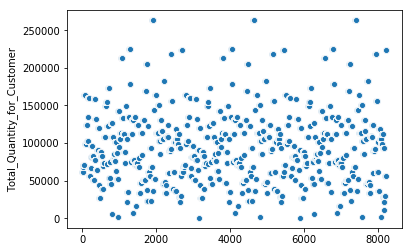

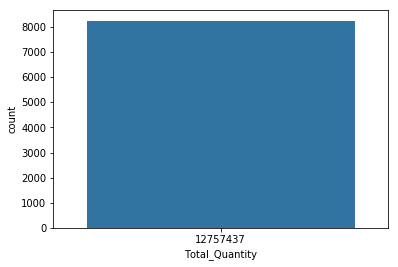

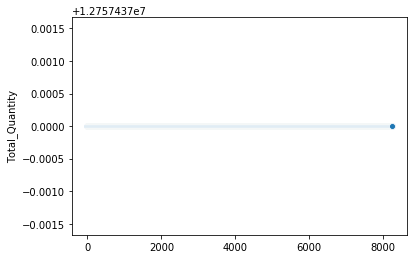

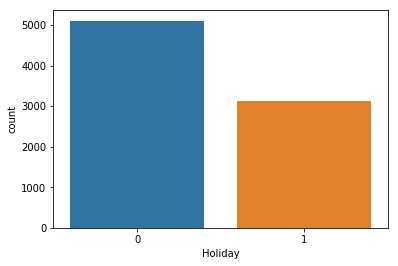

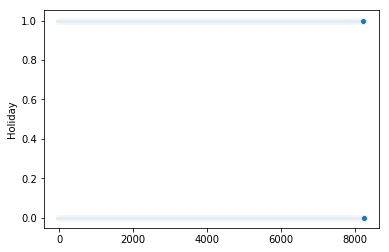

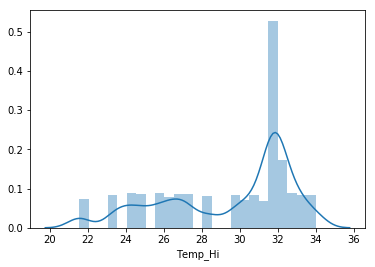

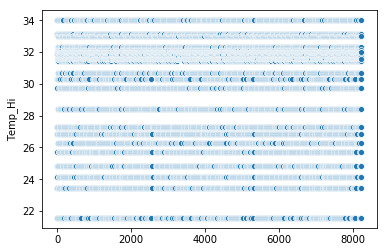

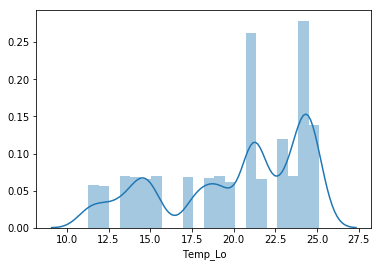

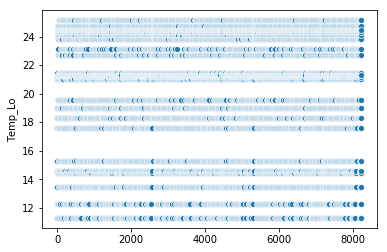

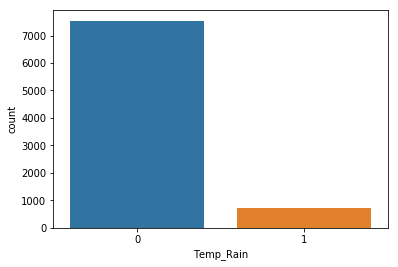

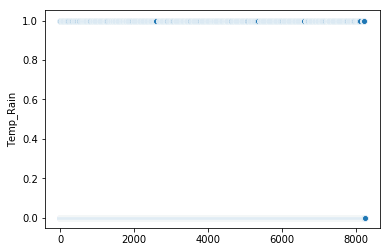

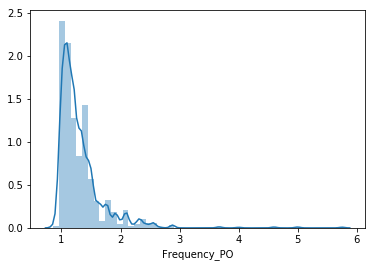

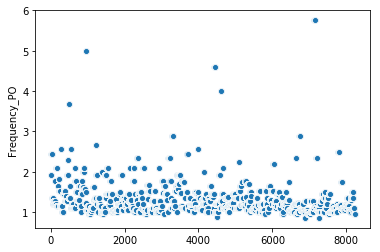

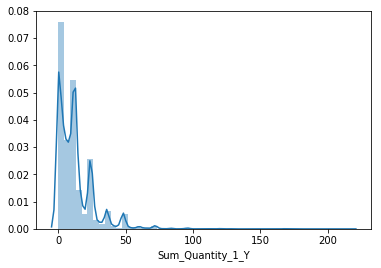

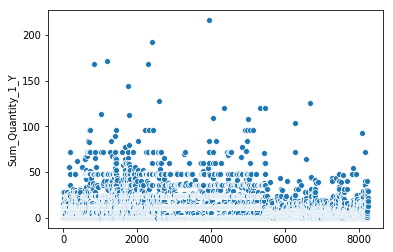

<Figure size 432x288 with 0 Axes>

In [28]:
## Creat an HTML page of the Mechkar lib

mechkar.pyMechkar().exploreData(data=Data2)


In [29]:
print (Data2.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                  
                     count    sum       mean
Product                                     
7290000408354         2715  43162  15.897606
7290003029433         2743  41181  15.013124
7290003029792         2783  18778   6.747395


In [30]:
## print (Data2)

In [31]:
## stop at "defining the error" @ Tree based models - Hyperparamaters

In [32]:
Data2ByProduct = Data2.sort_values(by=['Product', 'Weeknum'])
print(Data2ByProduct.head())

     Customer_ID  Weeknum        Product Customer_Number  Sum_Quantity  \
0         0.0048       11  7290000408354       416000001             0   
36        0.0056       11  7290000408354       416000005             4   
58        0.0129       11  7290000408354       416000006            12   
81        0.0077       11  7290000408354       416000007            12   
105       0.0098       11  7290000408354       416000008            12   

    Avg_Price_Change  Avg_Price_Change_1  Sum_Quantity_1_minus_Sum_Quantity  \
0               2.97                2.97                                 12   
36              2.97                2.97                                  0   
58              2.97                2.97                                  7   
81              2.97                2.97                                  0   
105             2.97                2.97                                -12   

     Avg_Quantity_for_Week  Avg_Quantity_for_PO        ...         \
0          

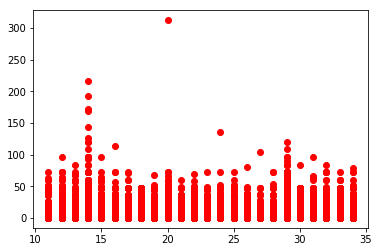

In [33]:
plt.plot (Data.Weeknum, Data.Sum_Quantity, 'ro')

In [34]:
# we can see that in week 14 the quantities are very high, and on week 15 are very low, 

## Z score + Outliers

In [35]:
from scipy import stats

[0.90033496 0.01338923 0.90033496 ... 1.24311723 0.06052292 0.06052292]


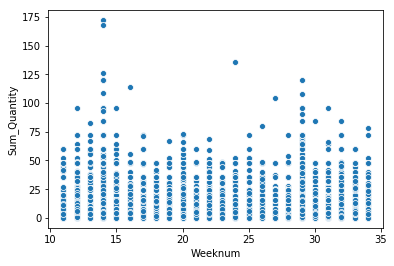

In [34]:
# Z score
z = np.abs(stats.zscore(Data.Sum_Quantity))
print(z)

## Eliminating  points
threshold = 190
Data = Data[(Data.Sum_Quantity < threshold)]

sns.scatterplot(x=Data.Weeknum,y=Data.Sum_Quantity)

[0.2735419  0.2735419  0.2735419  ... 0.56172991 0.56172991 0.56172991]


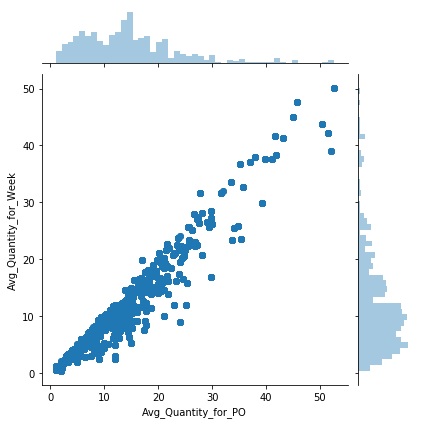

In [35]:
# Original plot
z = np.abs(stats.zscore(Data.Avg_Quantity_for_PO))
print(z)
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()



[0.2735419  0.2735419  0.2735419  ... 0.56172991 0.56172991 0.56172991]


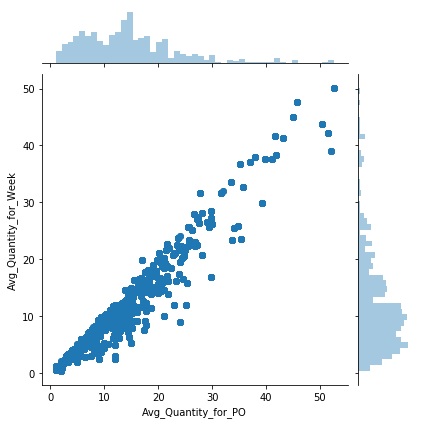

In [36]:
# updated plot 

## Eliminating points
threshold = 55
Data = Data[(Data.Avg_Quantity_for_PO < threshold)]

sns.jointplot(x=Data.Avg_Quantity_for_PO,y=Data.Avg_Quantity_for_Week)

z = np.abs(stats.zscore(Data.Avg_Quantity_for_PO))
print(z)



## Single product tests 

In [39]:
# extract a single product (7290003029792) and plot its quantities per week
P792 = Data2ByProduct.Product == 7290003029792
Prod792 = Data2ByProduct.copy()[P792]
Prod792.head()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
5458,0.0048,11,7290003029792,416000001,5,13.82,13.82,-2,3.70,3.86,...,0,0,60916,12757437,0,21.57,11.29,0,1.05,3
5497,0.0129,11,7290003029792,416000006,3,13.82,13.82,1,6.43,6.73,...,0,0,164021,12757437,0,21.57,11.29,0,1.05,4
5521,0.0077,11,7290003029792,416000007,2,13.82,13.82,2,3.65,4.20,...,0,0,98187,12757437,0,21.57,11.29,0,1.15,4
5545,0.0098,11,7290003029792,416000008,27,13.82,13.82,-21,6.96,7.62,...,0,0,124461,12757437,0,21.57,11.29,0,1.10,6
5568,0.0081,11,7290003029792,416000009,8,13.82,13.82,0,6.22,8.41,...,0,0,103273,12757437,0,21.57,11.29,0,1.35,8


Text(0.5,1,'7290003029792 with Holiday')

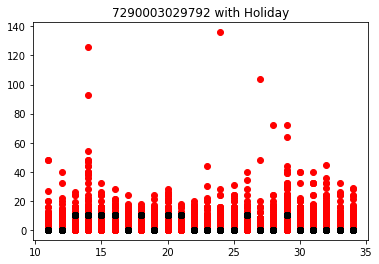

In [40]:
plt.plot (Prod792.Weeknum, Prod792.Sum_Quantity, 'ro')
plt.plot (Data.Weeknum, (Data.Holiday)*10, 'ro', color='black')
plt.title ('7290003029792 with Holiday')

In [41]:
z = np.abs(stats.zscore(Prod792.Sum_Quantity))
print(z)


[0.21146773 0.45350544 0.57452429 ... 0.816562   0.45350544 0.75668311]


In [42]:
Prod792.describe()

,Customer_ID,Weeknum,Sum_Quantity,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,All_week,Count_week_PO,Total_Quantity_for_Customer,Temp_Hi,Temp_Lo,Frequency_PO,Sum_Quantity_1_Y
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,0.007832,22.720446,6.747395,13.815861,4.359684,6.935217,7.670481,22.083363,19.112828,99945.851599,29.481991,20.089421,1.205670,6.784765
std,0.003762,6.885698,8.264660,0.157433,14.611909,5.202149,5.082681,2.774969,4.027251,48000.833418,3.417453,4.189236,0.347171,7.825838
min,0.000000,11.000000,0.000000,6.910000,-128.000000,0.350000,1.000000,1.000000,1.000000,401.000000,21.570000,11.290000,0.860000,0.000000
25%,0.005000,17.000000,2.000000,13.820000,-1.000000,3.610000,4.200000,23.000000,17.000000,63645.000000,26.860000,17.570000,1.050000,2.000000
50%,0.007500,23.000000,5.000000,13.820000,1.000000,5.570000,6.440000,23.000000,20.000000,95217.000000,31.430000,21.290000,1.150000,5.000000
75%,0.010000,29.000000,8.000000,13.820000,6.000000,8.570000,9.380000,23.000000,22.000000,127233.000000,32.000000,24.140000,1.280000,8.000000
max,0.020600,34.000000,136.000000,13.820000,206.000000,28.140000,28.140000,23.000000,24.000000,263223.000000,34.000000,25.140000,5.750000,126.000000


It can be seen that the quantities are subjected to the Holidays (@ week 15)

## Find Correlation and P-Values 

In [43]:
df = pd.DataFrame(Data, columns = ['Sum_Quantity','Sum_Quantity_1_Y'])
from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["Sum_Quantity"], df["Sum_Quantity_1_Y"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


Pearson Correlation Coefficient:  0.24569082163261244 and a P-value of: 1.3240200366705628e-112


In [44]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [45]:
## Calculate the P Value of the different paramaters (The p-value roughly indicates the probability of an uncorrelated system therefore we are looking for thos)
calculate_pvalues(Data)

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,0,0.4935,0.5812,0,0,0.4764,0.4759,0,0,0,...,0.1385,0,0,1,0.9032,0.4135,0.275,0.8114,0,0
Weeknum,0.4935,0,0.7228,0.6287,0.7323,0.6825,0.6941,0.2207,0.4743,0.7711,...,0.3744,0,0.4959,1,0,0,0,0,0.0047,0.9552
Product,0.5812,0.7228,0,0.9105,0,0,0,0.0001,0,0,...,0.6004,0.0472,0.5863,1,0.7168,0.7478,0.668,0.9172,0,0
Customer_Number,0,0.6287,0.9105,0,0.0299,0.976,0.9784,0,0.0001,0.034,...,0.8325,0.3105,0,1,0.6599,0.5734,0.4914,0.5873,0.0018,0.031
Sum_Quantity,0,0.7323,0,0.0299,0,0,0,0.0029,0,0,...,0.3925,0,0,1,0,0.3739,0.1579,0.106,0,0
Avg_Price_Change,0.4764,0.6825,0,0.976,0,0,0,0,0,0,...,0.6627,0,0.4804,1,0.8735,0.7379,0.6131,0.9612,0,0
Avg_Price_Change_1,0.4759,0.6941,0,0.9784,0,0,0,0,0,0,...,0.6617,0,0.4798,1,0.7432,0.7532,0.6446,0.891,0,0
Sum_Quantity_1_minus_Sum_Quantity,0,0.2207,0.0001,0,0.0029,0,0,0,0,0,...,0.9957,0,0,1,0.0803,0.4579,0.2923,0.0002,0,0
Avg_Quantity_for_Week,0,0.4743,0,0.0001,0,0,0,0,0,0,...,0.4701,0,0,1,0.6556,0.5346,0.5902,0.5081,0,0
Avg_Quantity_for_PO,0,0.7711,0,0.034,0,0,0,0,0,0,...,0.5659,0.9482,0,1,0.6118,0.7753,0.9106,0.4973,0,0


In [46]:
show_p = calculate_pvalues(Data)

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


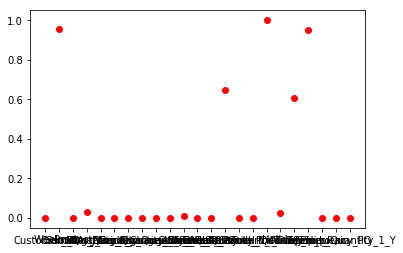

In [47]:
plt.plot(show_p['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [48]:
## present the corelletion (+1 or -1 implying corelation where exeact -1 or 1 implaying linear corr; 0 implying NO corr)
df = pd.DataFrame(data=Data)
df.corr()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1.000000,0.007578,0.006103,0.084515,0.252175,0.007879,0.007889,0.151602,0.412476,0.365358,...,0.016389,-0.105048,0.999971,NaN,-0.001345,0.009047,0.012078,-0.002640,-0.334161,0.253647
Weeknum,0.007578,1.000000,0.003925,0.005350,0.003785,0.004526,0.004353,-0.013550,-0.007917,-0.003220,...,0.009829,0.059704,0.007535,NaN,-0.405100,0.666987,0.935381,-0.293200,0.031298,-0.000622
Product,0.006103,0.003925,1.000000,-0.001243,-0.157131,0.539517,0.539863,-0.042353,-0.240728,-0.298595,...,-0.005795,-0.021956,0.006021,NaN,-0.004013,0.003558,0.004746,-0.001150,-0.122527,-0.164334
Customer_Number,0.084515,0.005350,-0.001243,1.000000,0.024026,-0.000333,-0.000300,0.059121,0.042020,0.023451,...,-0.002340,-0.011221,0.084082,NaN,-0.004870,0.006230,0.007614,-0.006006,-0.034546,0.023867
Sum_Quantity,0.252175,0.003785,-0.157131,0.024026,1.000000,-0.289488,-0.288315,0.032919,0.616885,0.603961,...,-0.009462,-0.359292,0.252285,NaN,0.088866,-0.009838,-0.015624,0.017883,-0.192698,0.245691
Avg_Price_Change,0.007879,0.004526,0.539517,-0.000333,-0.289488,1.000000,0.999710,-0.055761,-0.434082,-0.555367,...,0.004826,-0.171570,0.007809,NaN,0.001762,0.003703,0.005595,-0.000538,-0.195777,-0.294673
Avg_Price_Change_1,0.007889,0.004353,0.539863,-0.000300,-0.288315,0.999710,1.000000,-0.057623,-0.434114,-0.555352,...,0.004841,-0.170557,0.007819,NaN,0.003625,0.003480,0.005103,-0.001516,-0.195674,-0.296478
Sum_Quantity_1_minus_Sum_Quantity,0.151602,-0.013550,-0.042353,0.059121,0.032919,-0.055761,-0.057623,1.000000,0.348525,0.304406,...,-0.000060,0.168636,0.151760,NaN,-0.019353,-0.008213,-0.011652,-0.041280,-0.141620,0.772734
Avg_Quantity_for_Week,0.412476,-0.007917,-0.240728,0.042020,0.616885,-0.434082,-0.434114,0.348525,1.000000,0.961419,...,0.007992,-0.067031,0.412674,NaN,0.004935,-0.006871,-0.005958,0.007323,-0.357750,0.619017
Avg_Quantity_for_PO,0.365358,-0.003220,-0.298595,0.023451,0.603961,-0.555367,-0.555352,0.304406,0.961419,1.000000,...,0.006352,0.000719,0.365567,NaN,0.005616,-0.003158,-0.001243,0.007510,-0.177545,0.608648


In [49]:
show_corr = df.corr()

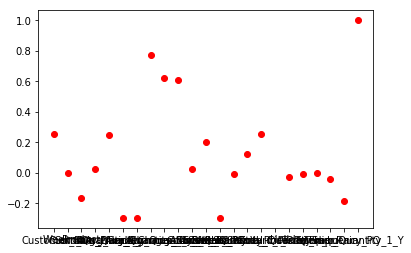

In [50]:
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

## Prediction calculation 

In [51]:
## sort the data by product

Data = Data.sort_values(by=['Product', 'Weeknum'])

# check the dataset balance
print (Data.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                  
                     count    sum       mean
Product                                     
7290000408354         2666  40617  15.235184
7290003029433         2721  40125  14.746417
7290003029792         2783  18778   6.747395


In [52]:
y = Data.values[:, -1]
x = Data.values[:, 0:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x_train = x[train_indx]
x_test = x[test_indx]
y_train = y[train_indx]
y_test = y[test_indx]

In [53]:
#y = Data.values[:, -1]
#x = Data.values[:, 0:-1]

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [54]:
# Train number of line (90%)
print("train:", len (x_train))
print ("test: ", len (x_test))



train: 7353
test:  817


## Train&Test Balance 

In [55]:
##  products balance in train 
## 7290000408354
## 7290003029433
## 7290003029792

i = 0
P354 = 0 
P433 = 0
P792 = 0

x_test [0,0]

for i in range(len (x_train)):
    if (x_train [i,2]) == 7290000408354:
        P354 = P354+1
    elif (x_train [i,2]) == 7290003029433:
        P433 = P433+1
    elif (x_train [i,2]) == 7290003029792:
        P792 = P792+1         

print ("the products distribution on Train is: ", P354, P433, P792)  
        

the products distribution on Train is:  2403 2451 2499


In [56]:
##  products balance in test 
## 7290000408354
## 7290003029433
## 7290003029792

i = 0
P354 = 0 
P433 = 0
P792 = 0

x_test [0,0]

for i in range(len (x_test)):
    if (x_test [i,2]) == 7290000408354:
        P354 = P354+1
    elif (x_test [i,2]) == 7290003029433:
        P433 = P433+1
    elif (x_test [i,2]) == 7290003029792:
        P792 = P792+1         

print ("the products distribution on Test is:", P354, P433, P792)  
        


the products distribution on Test is: 263 270 284


## Prediciton of  "Data"

In [57]:
mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x_train, y_train)
pred_linear = mod_linear.predict(x_test)
pred_linear = np.round(pred_linear)
## pred_linear_cvs = mod_linear.predict(csvTest) ## write to file
acc_linear=accuracy_score(y_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

acc linear 95
MAE linear 4.1358629130966955
MAE train linear 4.011287909696723


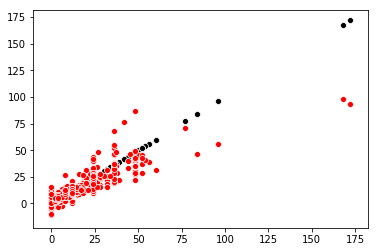

In [58]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_linear, color="red")
plt.show()

In [59]:
mod_svm = svm.SVC (kernel='sigmoid',gamma=3 ,probability=False, random_state=0)
y_pred_svm = mod_svm.fit(x_train,y_train)
pred_svm = mod_svm.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm, normalize=False)
print("acc svm", acc_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)
print("MAE svm",mae_svm)

pred_train_svm = mod_svm.predict(x_train)
mae_train_svm = mean_absolute_error(y_train, pred_train_svm)
print("MAE train svm", mae_train_svm)

acc svm 176
MAE svm 9.320685434516523
MAE train svm 9.001903984768122


In [60]:
## using sigmoid 
## Acc 180 outof 827
## MAE 9.14

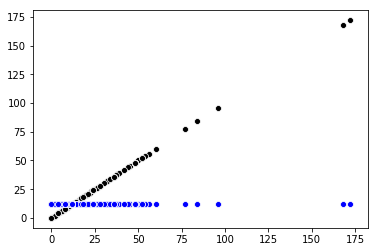

In [61]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_svm, color="blue")
plt.show()

In [62]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y_pred_AdaBoost = mod_rforest.fit(x_train,y_train)
pred_AdaBoost = mod_rforest.predict(x_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x_train)
mae_train_AdaBoost = mean_absolute_error(y_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

acc AdaBoost 240
mea AdaBoost 6.543451652386781
MAE train AdaBoost 6.205766353869169


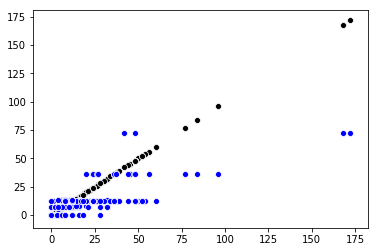

In [63]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_AdaBoost, color="blue")
plt.show()

In [64]:
from sklearn.naive_bayes import GaussianNB
mod_bayes = GaussianNB()
y_pred_naive = mod_bayes.fit(x_train,y_train)
pred_naive = mod_bayes.predict(x_test)
acc_naive=accuracy_score(y_test, pred_naive, normalize=False)
print("acc naive", acc_naive)
mae_naive = mean_absolute_error(y_test, pred_naive)
print("MAE naive", mae_naive)

pred_train_naive = mod_bayes.predict(x_train)
mae_train_naive = mean_absolute_error(y_train, pred_train_naive)
print("MAE train naive", mae_train_naive)

acc naive 5
MAE naive 28.223990208078334
MAE train naive 28.22548619611043


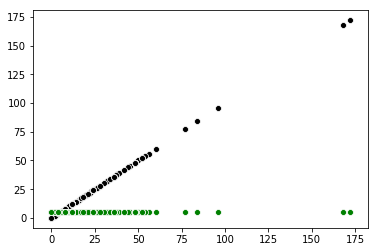

In [65]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=acc_naive, color="green")
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train,y_train)
pred_logistic = mod_logistic.predict(x_test)
acc_logistic=accuracy_score(y_test, pred_logistic, normalize=False)
print("acc logistic", acc_logistic)
mae_logistic = mean_absolute_error(y_test, pred_logistic)
print("MAE logistic", mae_logistic)

pred_train_logistic = mod_logistic.predict(x_train)
mae_train_logistic = mean_absolute_error(y_train, pred_train_logistic)
print("MAE train logistic", mae_train_logistic)

acc logistic 176
MAE logistic 9.320685434516523
MAE train logistic 9.001903984768122


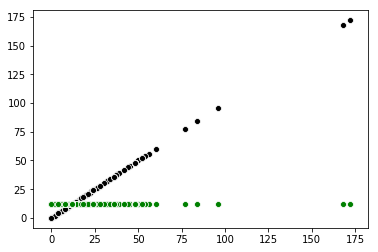

In [67]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_logistic, color="green")
plt.show()

## Initiate a new database of High Correlation columns 

In [6]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 
## based on the p-value and Pearson Correlation 
DropData = Data.drop(columns=['Weeknum', 'Customer_Number', 'All_week', 'Above_Standard_Price','Below_Standard_Price','Total_Quantity','Holiday','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO'])
print(DropData.dtypes)
#print(DropData.head())

Customer_ID                          float64
Product                                int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
Count_week_PO                          int64
Standard_Price                       float64
Total_Quantity_for_Customer            int64
Sum_Quantity_1_Y                       int64
dtype: object


In [7]:
y= DropData.values[:, -1]
x = DropData.values[:, 0:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x2_train = x[train_indx]
x2_test = x[test_indx]
y2_train = y[train_indx]
y2_test = y[test_indx]

In [8]:
#y2 = DropData.values[:, -1]
#x2 = DropData.values[:, 0:-1]

#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.10, random_state=42)

In [9]:
# Use Ada boost
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x2_train)
mae_train_AdaBoost = mean_absolute_error(y2_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

acc AdaBoost 287
mea AdaBoost 7.290048543689321
MAE train AdaBoost 6.580962653363894


In [11]:
# Use Linear Reg 

mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x2_train, y2_train)
pred_linear = mod_linear.predict(x2_test)
pred_linear = np.round(pred_linear)
acc_linear=accuracy_score(y2_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y2_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x2_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y2_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

acc linear 98
MAE linear 4.504854368932039
MAE train linear 4.011460159093973


## Drop Data 2, based on manual tests 

In [12]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 
## based on the p-value and Pearson Correlation 
DropData2 = Data.drop(columns=['Standard_Price','Avg_Quantity_for_PO','Total_Quantity_for_Customer','Weeknum','Customer_Number','All_week','Below_Standard_Price','Above_Standard_Price','Holiday','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO'])

## Droped: 
DropData2.dtypes

Customer_ID                          float64
Product                                int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Count_week_PO                          int64
Total_Quantity                         int64
Sum_Quantity_1_Y                       int64
dtype: object

In [13]:
y= DropData2.values[:, -1]
x = DropData2.values[:, 0:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x2_train = x[train_indx]
x2_test = x[test_indx]
y2_train = y[train_indx]
y2_test = y[test_indx]

In [14]:
#y2 = DropData.values[:, -1]
#x2 = DropData.values[:, 0:-1]

#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.10, random_state=42)

In [15]:
## USe Ada boost
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x2_train)
mae_train_AdaBoost = mean_absolute_error(y2_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

acc AdaBoost 273
mea AdaBoost 7.336165048543689
MAE train AdaBoost 6.7021706889578


In [16]:
## Use linear reg

mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x2_train, y2_train)
pred_linear = mod_linear.predict(x2_test)
pred_linear = np.round(pred_linear)
acc_linear=accuracy_score(y2_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y2_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x2_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y2_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

acc linear 109
MAE linear 4.122572815533981
MAE train linear 4.1604422273156265


##  Cross Validation 

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

#print(Data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


cont 2 Score [-6.41123541 -7.11803844]
Mean-Abs-Error 6.764636925571432


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


cont 5 Score [-7.74493445 -6.50791717 -8.40761203 -5.18355995 -6.91703057]
Mean-Abs-Error 6.9522108340219715


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cont 10 Score [-9.39195402 -7.57669441 -7.53670277 -5.73058252 -5.16053922 -4.89480198
 -7.06616729 -4.2406015  -3.86901763 -6.31893266]
Mean-Abs-Error 6.1785994004851315


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


cont 15 Score [ -8.9966611   -7.66549912  -6.03546099  -7.36917563  -6.23956443
 -10.33272395  -5.28360958  -3.61878453  -5.53432282  -7.14018692
  -5.04323308  -3.94507576  -3.84099617  -5.40690979  -4.78529981]
Mean-Abs-Error 6.082500244699952


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


cont 20 Score [-10.15138593  -8.97291196  -5.23853211  -4.93735499  -5.81455399
  -8.73159145  -5.75903614  -5.78208232  -4.89512195  -5.01728395
  -5.08977556  -4.12311558  -5.95696203  -4.13994911  -4.82307692
  -3.65374677  -4.4119171   -3.99220779  -5.734375    -4.69109948]
Mean-Abs-Error 5.595804006710219


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=25.
  % (min_groups, self.n_splits)), Warning)


cont 25 Score [-10.20725389  -9.26536313  -6.52571429  -6.27456647  -6.48837209
  -5.9941349   -7.59643917  -8.37388724  -7.19642857  -5.53313253
  -5.39209726  -5.59327217  -4.74382716  -5.2484472   -5.40566038
  -5.82911392  -5.65714286  -5.12779553  -4.20833333  -3.34627832
  -3.72222222  -3.87213115  -4.82295082  -4.95364238  -4.45666667]
Mean-Abs-Error 5.83339494612758


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


cont 30 Score [-9.98198198 -8.15309446 -6.96345515 -6.57912458 -5.07167235 -6.85862069
 -5.55052265 -6.07665505 -7.03859649 -5.41843972 -5.26071429 -5.73381295
 -5.14963504 -4.84981685 -5.36296296 -4.92857143 -5.48106061 -4.82509506
 -4.74712644 -4.12015504 -5.12840467 -3.76171875 -3.7109375  -3.74409449
 -4.07114625 -4.08333333 -3.98       -4.55241935 -4.09677419 -4.81781377]
Mean-Abs-Error 5.336591869229712


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


cont 40 Score [-11.89298893  -9.35510204  -7.07983193  -6.34615385  -8.19480519
  -6.53097345  -5.98190045  -6.1719457   -5.5733945   -5.88262911
  -6.54976303  -7.36538462  -6.31219512  -5.3627451   -4.22167488
  -5.80693069  -5.77114428  -4.955       -5.15075377  -5.44444444
  -4.99494949  -5.28282828  -5.58585859  -5.23857868  -5.88205128
  -5.85641026  -5.39175258  -5.05208333  -5.00520833  -4.21354167
  -3.86315789  -3.25263158  -5.97894737  -3.87301587  -3.71657754
  -5.15135135  -4.16756757  -4.83243243  -3.82162162  -4.67391304]
Mean-Abs-Error 5.644605996200031


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


cont 50 Score [-12.94323144 -10.15270936  -9.14720812  -9.56476684  -8.16753927
  -6.93617021  -5.7173913   -6.15217391  -6.20218579  -6.02777778
  -5.78651685  -4.83522727  -5.65317919  -6.35087719 -10.69822485
  -5.24404762  -5.71257485  -5.55421687  -6.13939394  -7.56441718
  -5.90740741  -5.          -4.82608696  -5.9         -5.24683544
  -5.29936306  -5.03870968  -5.30718954  -3.49673203  -5.05882353
  -4.47058824  -5.4248366   -4.92156863  -5.12418301  -5.02631579
  -5.26490066  -4.35761589  -3.73509934  -4.05960265  -2.95302013
  -3.94594595  -3.88513514  -3.42176871  -3.75510204  -5.06164384
  -4.05555556  -3.78472222  -4.14583333  -3.84507042  -5.8028169 ]
Mean-Abs-Error 5.653446050457768


In [28]:
## Cross Validation of the Linear model 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

#print(Data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())


count: 2 Mean-Abs-Error 7.684433540348386
count: 5 Mean-Abs-Error 4.2163796749275555
count: 10 Mean-Abs-Error 4.196328178851146
count: 15 Mean-Abs-Error 4.197220332641665
count: 20 Mean-Abs-Error 4.1928686146854295
count: 25 Mean-Abs-Error 4.179608658044978
count: 30 Mean-Abs-Error 4.184608933514535
count: 40 Mean-Abs-Error 4.191161012182748
count: 50 Mean-Abs-Error 4.180904254020606


## Cross predict

In [81]:
from sklearn.model_selection import cross_val_predict
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 50)
#print(Data.head())

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_predict(mod_rforest, X, y, cv=i)
    #print("Predict cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Predict cont 2 Score [24. 12. 12. ... 12. 12. 12.]
Mean 13.167686658506732


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Predict cont 5 Score [12.  4. 12. ...  7.  7. 24.]
Mean 9.245654834761321


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Predict cont 10 Score [12.  3. 12. ...  7.  7. 24.]
Mean 9.377600979192167


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


Predict cont 15 Score [12. 13. 12. ...  8.  8. 24.]
Mean 10.738188494492045


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


Predict cont 20 Score [12. 13. 12. ...  8.  8. 24.]
Mean 10.669645042839658


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=25.
  % (min_groups, self.n_splits)), Warning)


Predict cont 25 Score [12.  4. 12. ...  4.  4. 24.]
Mean 10.115299877600979


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


Predict cont 30 Score [12.  4. 12. ...  8.  8. 24.]
Mean 10.869155446756427


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


Predict cont 40 Score [12.  4. 12. ...  4.  4. 24.]
Mean 11.147368421052631


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Predict cont 50 Score [12.  4. 12. ...  5.  5. 24.]
Mean 11.088494492044063


In [27]:
## Cross Predict Linear 
from sklearn.model_selection import cross_val_predict
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 50)
#print(Data.head())

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_predict(mod_linear, X, y, cv=i)
    #print("Predict cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", scores.mean())


count: 2 Mean-Abs-Error 16.699978204182166
count: 5 Mean-Abs-Error 12.755825363696584
count: 10 Mean-Abs-Error 12.679775874791506
count: 15 Mean-Abs-Error 12.703639316995806
count: 20 Mean-Abs-Error 12.712213070449536
count: 25 Mean-Abs-Error 12.704597267941788
count: 30 Mean-Abs-Error 12.69861244273933
count: 40 Mean-Abs-Error 12.710419308685621
count: 50 Mean-Abs-Error 12.70525062892422


## Cross validation of DropData (the reducted table)

In [82]:
## Note: the dataset is DropData

X = DropData.values[:, 0:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


cont 2 Score [-6.41123541 -7.11803844]
Mean-Abs-Error 6.764636925571432


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


cont 5 Score [-7.74493445 -6.50791717 -8.40761203 -5.18355995 -6.91703057]
Mean-Abs-Error 6.9522108340219715


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cont 10 Score [-9.39195402 -7.57669441 -7.53670277 -5.73058252 -5.16053922 -4.89480198
 -7.06616729 -4.2406015  -3.86901763 -6.31893266]
Mean-Abs-Error 6.1785994004851315


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


cont 15 Score [ -8.9966611   -7.66549912  -6.03546099  -7.36917563  -6.23956443
 -10.33272395  -5.28360958  -3.61878453  -5.53432282  -7.14018692
  -5.04323308  -3.94507576  -3.84099617  -5.40690979  -4.78529981]
Mean-Abs-Error 6.082500244699952


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


cont 20 Score [-10.15138593  -8.97291196  -5.23853211  -4.93735499  -5.81455399
  -8.73159145  -5.75903614  -5.78208232  -4.39756098  -6.99753086
  -5.08977556  -4.12311558  -5.95696203  -4.13994911  -4.71794872
  -3.65374677  -4.37046632  -3.86493506  -5.734375    -4.69109948]
Mean-Abs-Error 5.656245718128593


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=25.
  % (min_groups, self.n_splits)), Warning)


cont 25 Score [-9.35233161 -9.26536313 -6.52571429 -6.27456647 -6.48837209 -5.9941349
 -7.59643917 -8.37388724 -7.19642857 -5.53313253 -5.39209726 -5.59327217
 -4.74382716 -5.2484472  -5.40566038 -5.82911392 -5.72380952 -5.12779553
 -4.20833333 -3.34627832 -3.72222222 -3.87213115 -4.82295082 -4.95364238
 -4.61333333]
Mean-Abs-Error 5.808131388269203


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


cont 30 Score [-9.98198198 -8.15309446 -6.96345515 -6.57912458 -5.07167235 -6.85862069
 -5.55052265 -4.80139373 -7.03859649 -5.41843972 -5.26071429 -5.73381295
 -5.14963504 -4.84981685 -5.36296296 -4.92857143 -5.48106061 -4.82509506
 -4.68582375 -4.12015504 -5.12840467 -3.76171875 -3.7109375  -3.74409449
 -4.07114625 -4.08333333 -3.98       -4.55241935 -4.09677419 -4.77327935]
Mean-Abs-Error 5.290555255263391


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


cont 40 Score [-11.89298893  -9.35510204  -7.74369748  -6.34615385  -8.19480519
  -6.53097345  -5.78280543  -6.1719457   -5.5733945   -5.88262911
  -6.54976303  -7.36538462  -6.31219512  -5.3627451   -4.22167488
  -5.80693069  -5.72139303  -4.955       -5.15075377  -5.44444444
  -4.99494949  -5.28282828  -5.58585859  -5.23857868  -5.88205128
  -5.85641026  -5.39175258  -5.05208333  -5.00520833  -4.21354167
  -3.86315789  -3.25263158  -5.97894737  -3.87301587  -3.71657754
  -5.15135135  -4.16756757  -4.83243243  -3.82162162  -4.67391304]
Mean-Abs-Error 5.654981478195356


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


cont 50 Score [-12.94323144 -10.15270936  -9.14720812  -7.87564767  -8.16753927
  -7.0212766   -5.75        -6.15217391  -6.20218579  -6.02777778
  -5.5505618   -4.83522727  -5.65317919  -6.35087719 -10.69822485
  -5.24404762  -5.71257485  -5.55421687  -6.13939394  -7.56441718
  -5.25925926  -4.79503106  -4.82608696  -5.9         -5.24683544
  -5.29936306  -5.03870968  -5.19607843  -3.49673203  -5.05882353
  -4.47058824  -5.4248366   -4.92156863  -5.12418301  -5.02631579
  -5.26490066  -4.29801325  -3.73509934  -4.06622517  -2.95302013
  -3.91891892  -3.88513514  -3.42176871  -3.75510204  -5.06164384
  -4.05555556  -3.67361111  -4.14583333  -3.84507042  -5.33802817]
Mean-Abs-Error 5.5848961633602725


In [25]:
## Cross predict Drop Data Linear

X = DropData.values[:, 0:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

count: 2 Mean-Abs-Error 7.719821347847693
count: 5 Mean-Abs-Error 4.18686771042561
count: 10 Mean-Abs-Error 4.160061286677552
count: 15 Mean-Abs-Error 4.16155356088902
count: 20 Mean-Abs-Error 4.154707190215464
count: 25 Mean-Abs-Error 4.141824619587136
count: 30 Mean-Abs-Error 4.1459308061525295
count: 40 Mean-Abs-Error 4.152625708255202
count: 50 Mean-Abs-Error 4.142422096637313


## Cross validation of Drop Data2  (manual drop)

In [83]:
## Note: the dataset is DropData

X = DropData2.values[:, 0:-1]
y = DropData2.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


cont 2 Score [-6.41123541 -7.11803844]
Mean-Abs-Error 6.764636925571432


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


cont 5 Score [-6.34862932 -7.590743   -8.40761203 -6.42707046 -7.09856519]
Mean-Abs-Error 7.1745239993020276


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cont 10 Score [-7.50229885 -6.65636147 -7.06257521 -7.16383495 -6.52818627 -6.01113861
 -6.20474407 -4.6754386  -4.98740554 -5.10546379]
Mean-Abs-Error 6.189744736992374


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


cont 15 Score [ -8.39065109  -5.73905429  -5.32446809  -7.05197133  -9.13611615
 -10.33272395  -6.77532228  -6.6611418   -6.88311688  -6.2728972
  -5.95300752  -5.12878788  -4.86590038  -4.91746641  -4.84912959]
Mean-Abs-Error 6.552116989430332


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


cont 20 Score [-8.73347548 -5.96162528 -7.66972477 -7.2900232  -5.18779343 -8.79334917
 -6.66987952 -5.29297821 -7.23658537 -5.94320988 -6.61097257 -6.78140704
 -5.95696203 -4.75572519 -4.73589744 -6.63307494 -5.72020725 -4.92727273
 -5.10677083 -4.94502618]
Mean-Abs-Error 6.247598024134917


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=25.
  % (min_groups, self.n_splits)), Warning)


cont 25 Score [-9.23834197 -6.27653631 -5.82857143 -7.97687861 -7.12209302 -6.51026393
 -6.65875371 -9.21661721 -9.91964286 -9.44277108 -6.10638298 -5.33944954
 -6.02160494 -6.63043478 -5.48742138 -5.82911392 -6.73968254 -4.70607029
 -4.7275641  -4.94498382 -5.61111111 -4.66885246 -4.81967213 -5.86754967
 -5.4       ]
Mean-Abs-Error 6.443614552183118


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


cont 30 Score [ -9.91891892  -6.36156352  -6.          -7.75757576  -5.49146758
  -6.85862069  -6.17770035  -7.22996516 -11.97192982  -7.05319149
  -6.39285714  -6.47841727  -6.69708029  -5.74725275  -6.27037037
  -6.2518797   -6.67424242  -5.40304183  -5.88122605  -5.84108527
  -5.6692607   -5.578125    -5.1171875   -6.03149606  -5.79051383
  -4.69444444  -4.7         -5.59274194  -5.11693548  -5.51417004]
Mean-Abs-Error 6.342108712461547


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


cont 40 Score [-11.18819188  -8.91428571  -6.19747899  -6.15811966  -6.13852814
  -6.53097345  -6.19909502  -5.28506787  -7.03211009  -6.66197183
  -6.69194313  -7.31730769  -6.31219512  -6.94117647  -7.01970443
  -6.23267327  -6.14925373  -5.495       -4.89949749  -6.44949495
  -5.61111111  -6.72222222  -6.68181818  -5.52791878  -6.98461538
  -5.85641026  -6.09278351  -5.66666667  -4.26041667  -4.38541667
  -6.04736842  -5.5         -5.78421053  -5.35978836  -4.6631016
  -4.67027027  -4.47567568  -5.91351351  -4.8972973   -5.72826087]
Mean-Abs-Error 6.116073372928912


C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


cont 50 Score [-12.10917031  -9.97536946  -6.91370558  -8.10362694  -7.70680628
  -6.93617021  -6.36956522  -6.77173913  -8.06010929  -6.85555556
  -6.05617978  -7.41477273  -6.42774566 -10.16374269  -7.
  -6.2797619   -6.28742515  -7.51204819  -6.64848485  -8.60736196
  -6.80246914  -5.44720497  -5.16149068  -6.76875     -5.15189873
  -4.96815287  -5.04516129  -6.06535948  -5.05882353  -5.60784314
  -5.7254902   -5.54248366  -5.76470588  -4.91503268  -5.46710526
  -5.43708609  -5.13245033  -5.72847682  -6.13907285  -4.55033557
  -5.73648649  -4.61486486  -5.33333333  -5.95918367  -5.25342466
  -5.50694444  -5.6875      -5.0625      -4.59859155  -5.6971831 ]
Mean-Abs-Error 6.322574923409747


In [29]:
## Cross Validation Drop Data 2

## Note: the dataset is DropData

X = DropData2.values[:, 0:-1]
y = DropData2.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

count: 2 Mean-Abs-Error 102770.87480278699
count: 5 Mean-Abs-Error 4.2580622702807025
count: 10 Mean-Abs-Error 4.230479427991519
count: 15 Mean-Abs-Error 4.235789884471128
count: 20 Mean-Abs-Error 4.224211839908209
count: 25 Mean-Abs-Error 4.21420139835723
count: 30 Mean-Abs-Error 4.217900478030968
count: 40 Mean-Abs-Error 4.221756271100025
count: 50 Mean-Abs-Error 4.212422682522279
